In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


In [3]:
df=pd.read_csv('startup_financials_dirty.csv')

In [5]:
df.head()

,company_name,year_founded,revenue_year1,revenue_year2,revenue_year3,revenue_year4,revenue_year5,industry,employees,status
0,GreenTech,2018,59973,NaN,182383,866362.0,1202012.0,Technology,20.0,Inactive
1,FoodSpace,2019,191715,NaN,669902,643036.0,450700.0,Food,10.0,Active
2,EduWorld,2019,202676,262856.0,851332,884245.0,1464015.0,Education,50.0,Inactive
3,HealthPlus,2015,106739,NaN,306531,1762935.0,1929941.0,Health,NaN,Active
4,FinNova,2017,299838,339717.0,375438,NaN,242609.0,Finance,10.0,Active


In [7]:
df.isnull().sum()

company_name     0
year_founded     0
revenue_year1    0
revenue_year2    5
revenue_year3    0
revenue_year4    1
revenue_year5    1
industry         0
employees        1
status           0
dtype: int64

In [9]:
reveune_col=['revenue_year1','revenue_year2','revenue_year3','revenue_year4','revenue_year5']
df[reveune_col]=df[reveune_col].apply(lambda x:x.fillna(x.mean()),axis=1)

In [11]:
df['employees']=df['employees'].fillna(df['employees'].median())

In [17]:
df.isnull().sum()

company_name     0
year_founded     0
revenue_year1    0
revenue_year2    0
revenue_year3    0
revenue_year4    0
revenue_year5    0
industry         0
employees        0
status           0
dtype: int64

In [21]:
df.describe()

,year_founded,revenue_year1,revenue_year2,revenue_year3,revenue_year4,revenue_year5,employees
count,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000
mean,2017.600000,212925.300000,4.876386e+05,539788.900000,7.320964e+05,7.884881e+05,52.000000
std,1.429841,92926.080908,2.249467e+05,216420.832887,4.463837e+05,5.734184e+05,63.691967
min,2015.000000,59973.000000,2.403010e+05,182383.000000,1.419240e+05,2.426090e+05,5.000000
25%,2017.000000,140422.500000,3.561749e+05,389465.500000,5.105240e+05,3.859267e+05,10.000000
50%,2017.500000,214027.500000,4.580926e+05,561370.500000,6.368590e+05,4.670960e+05,20.000000
75%,2019.000000,297797.500000,5.602751e+05,682754.000000,8.797742e+05,1.142137e+06,87.500000
max,2019.000000,322188.000000,1.026536e+06,851332.000000,1.762935e+06,1.929941e+06,200.000000


In [23]:
df['industry'].value_counts()

industry
Technology      1
Food            1
Education       1
Health          1
Finance         1
Environment     1
Healthcare      1
Construction    1
Agriculture     1
Energy          1
Name: count, dtype: int64

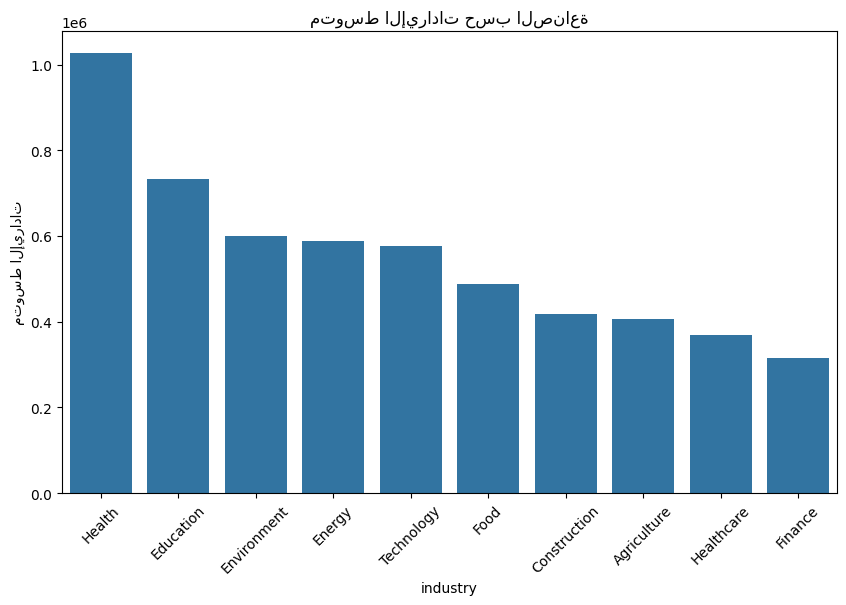

In [33]:
industry_revenue=df.groupby('industry')[reveune_col].mean().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=industry_revenue.index, y=industry_revenue.values)
plt.xticks(rotation=45)
plt.title('متوسط الإيرادات حسب الصناعة')
plt.ylabel('متوسط الإيرادات')
plt.show()

In [43]:

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)  


predicted_revenue = []

for i, row in df.iterrows():
    y = row[reveune_col].values.reshape(-1,1)  
    model = LinearRegression()
    model.fit(X, y)
    next_year_revenue = model.predict([[6]])[0][0]
    predicted_revenue.append(next_year_revenue)


df['predicted_revenue_year6'] = predicted_revenue


df[['company_name', 'predicted_revenue_year6']].head()


,company_name,predicted_revenue_year6
0,GreenTech,1349509.750
1,FoodSpace,690488.575
2,EduWorld,1676244.900
3,HealthPlus,2341377.250
4,FinNova,272468.150


In [47]:
df.to_csv('startup_financials_final.csv', index=False)
